In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
data = pd.read_csv('Occupancy_Estimation.csv')

In [3]:
df = data.copy()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
# Convert column
df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Change column to index
df.set_index('date_time', inplace = True)

# Drop columns
df.drop(columns = ['date', 'time'], inplace = True)

In [6]:
df.describe()

,s1_temp,s2_temp,s3_temp,s4_temp,s1_light,s2_light,s3_light,s4_light,s1_sound,s2_sound,s3_sound,s4_sound,s5_co2,s5_co2_slope,s6_pir,s7_pir,room_occupancy_count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


**Exploratory DATA Analysis**

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

<Figure size 1600x1200 with 0 Axes>

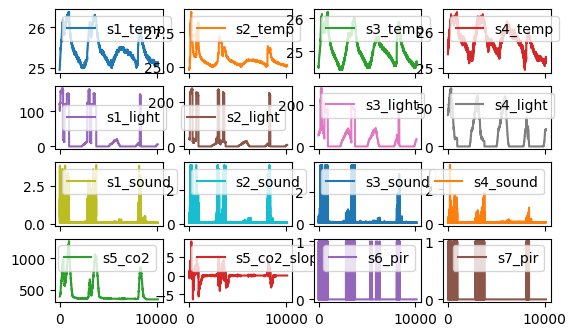

In [7]:
cols = df[['s1_temp',  's2_temp',      's3_temp',     's4_temp',   's1_light',  's2_light',
           's3_light', 's4_light',     's1_sound',    's2_sound',  's3_sound',  's4_sound',
           's5_co2',   's5_co2_slope', 's6_pir',      's7_pir']]

cols.reset_index(inplace = True)
cols.drop(columns = 'date_time', inplace = True)

plt.figure(figsize= (16,12))
cols.plot(subplots=True, layout=(5,4))

Text(0.5, 0.98, 'Temperature Distribution')

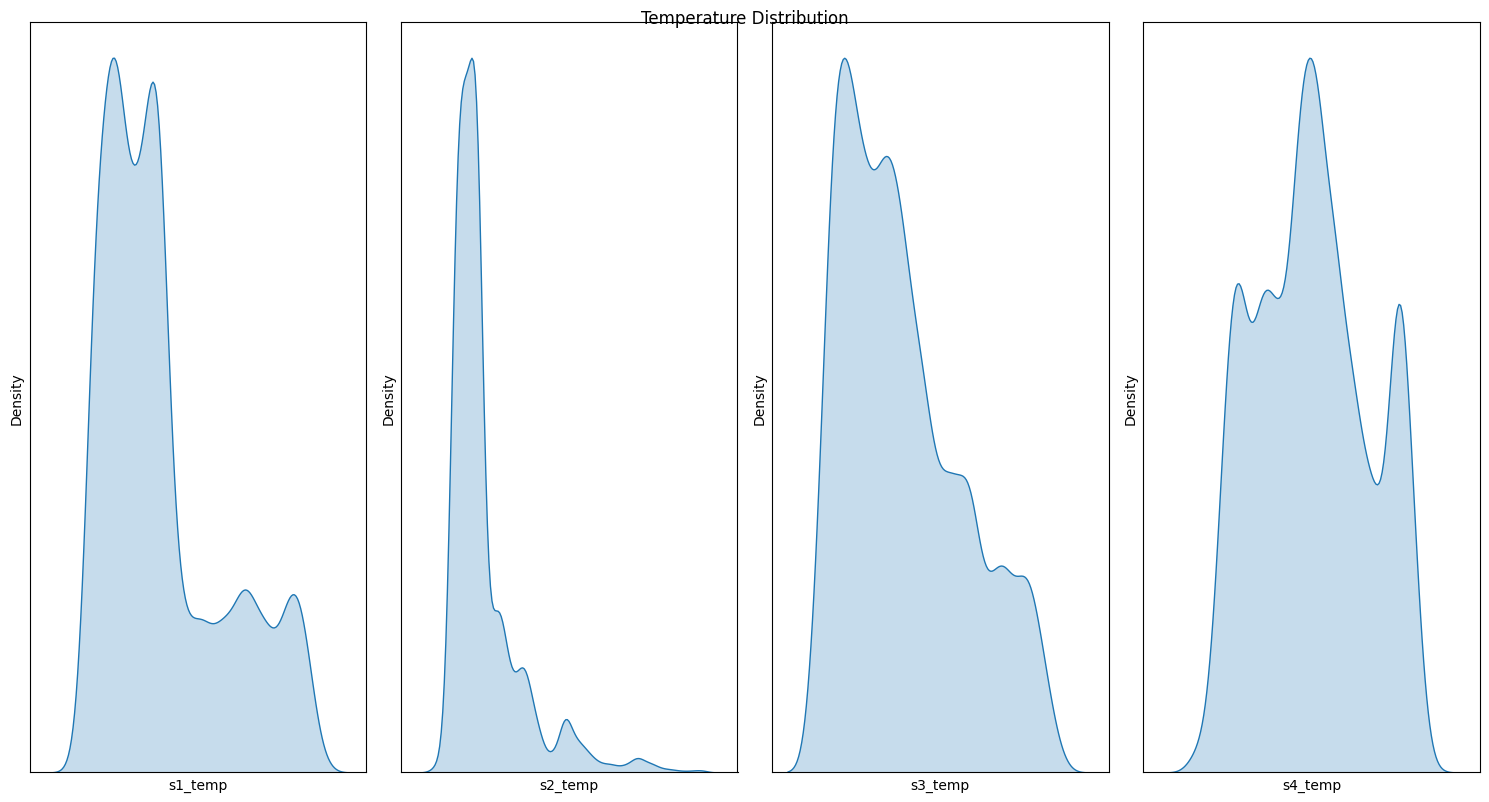

In [8]:
# Distribution of 'temperature' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_temp",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_temp")
fig.tight_layout()
plt.suptitle("Temperature Distribution", va = 'baseline')

Text(0.5, 0.98, 'Temperature Distribution')

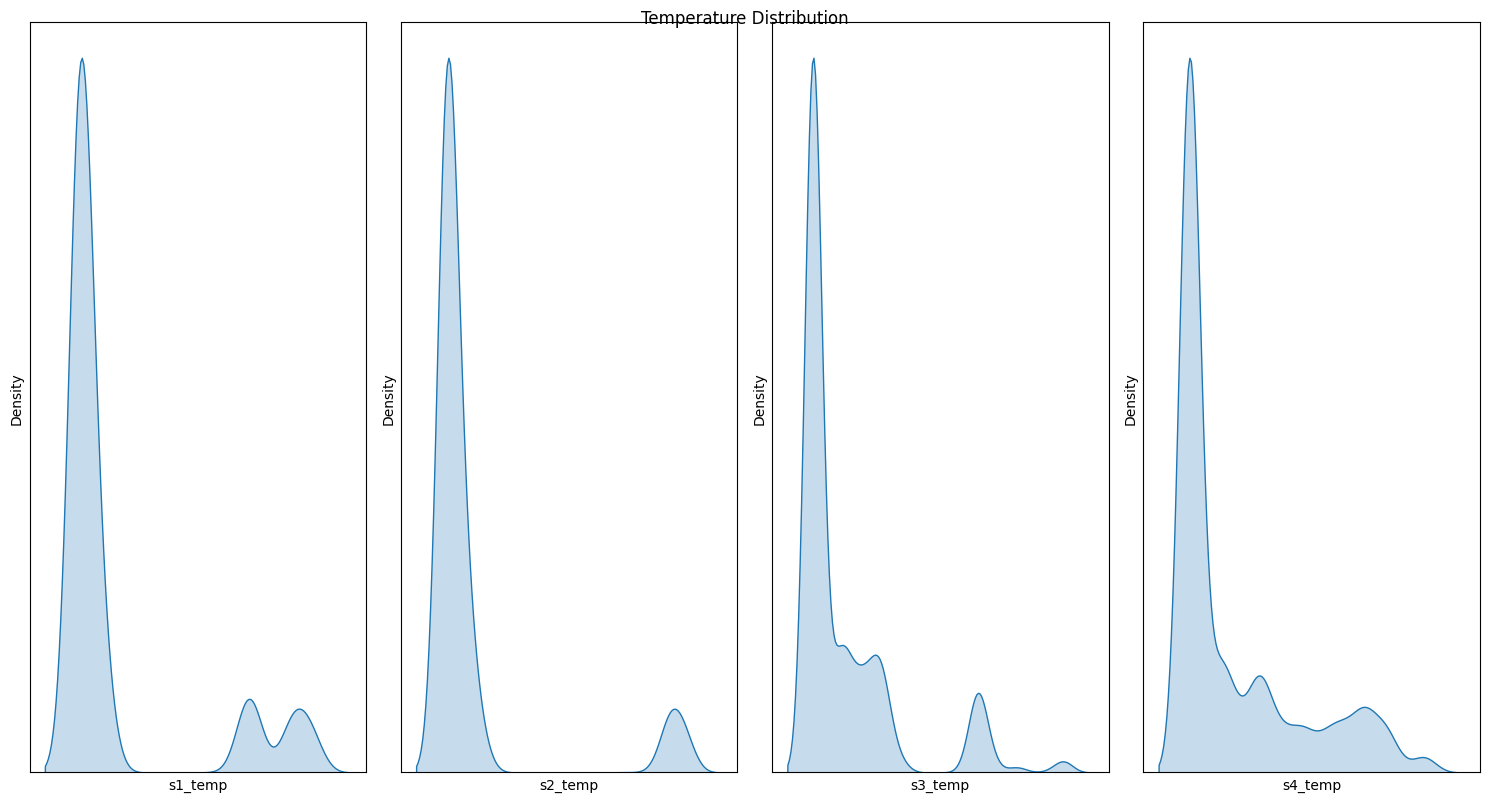

In [9]:
# Distribution of 'light' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_light",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_temp")
fig.tight_layout()
plt.suptitle("Temperature Distribution", va = 'baseline')

Text(0.5, 0.98, 'Temperature Distribution')

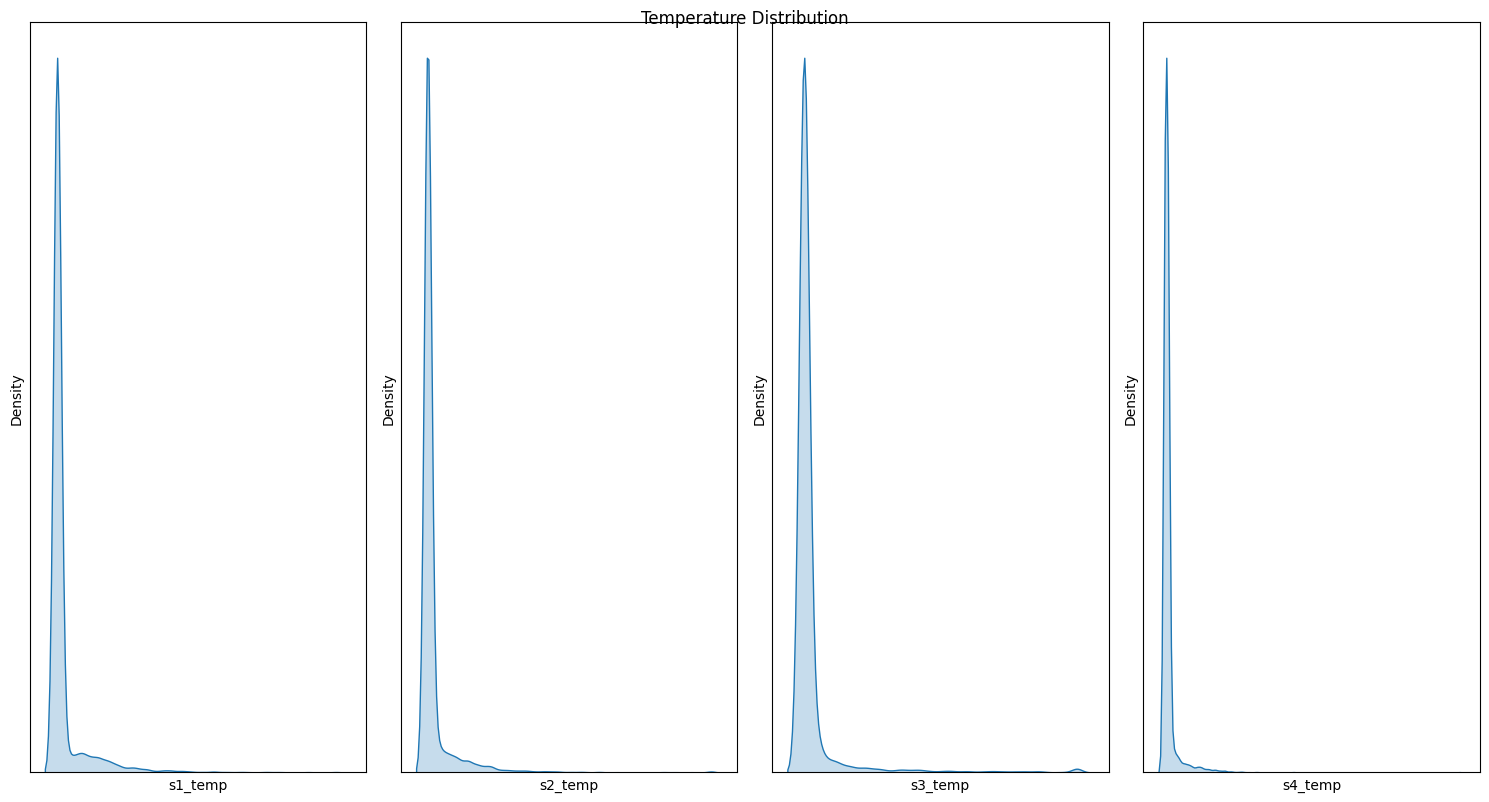

In [10]:
# Distribution of 'temperature' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_sound",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_temp")
fig.tight_layout()
plt.suptitle("Temperature Distribution", va = 'baseline')

**OUTLIER ANALYSIS**

<Axes: >

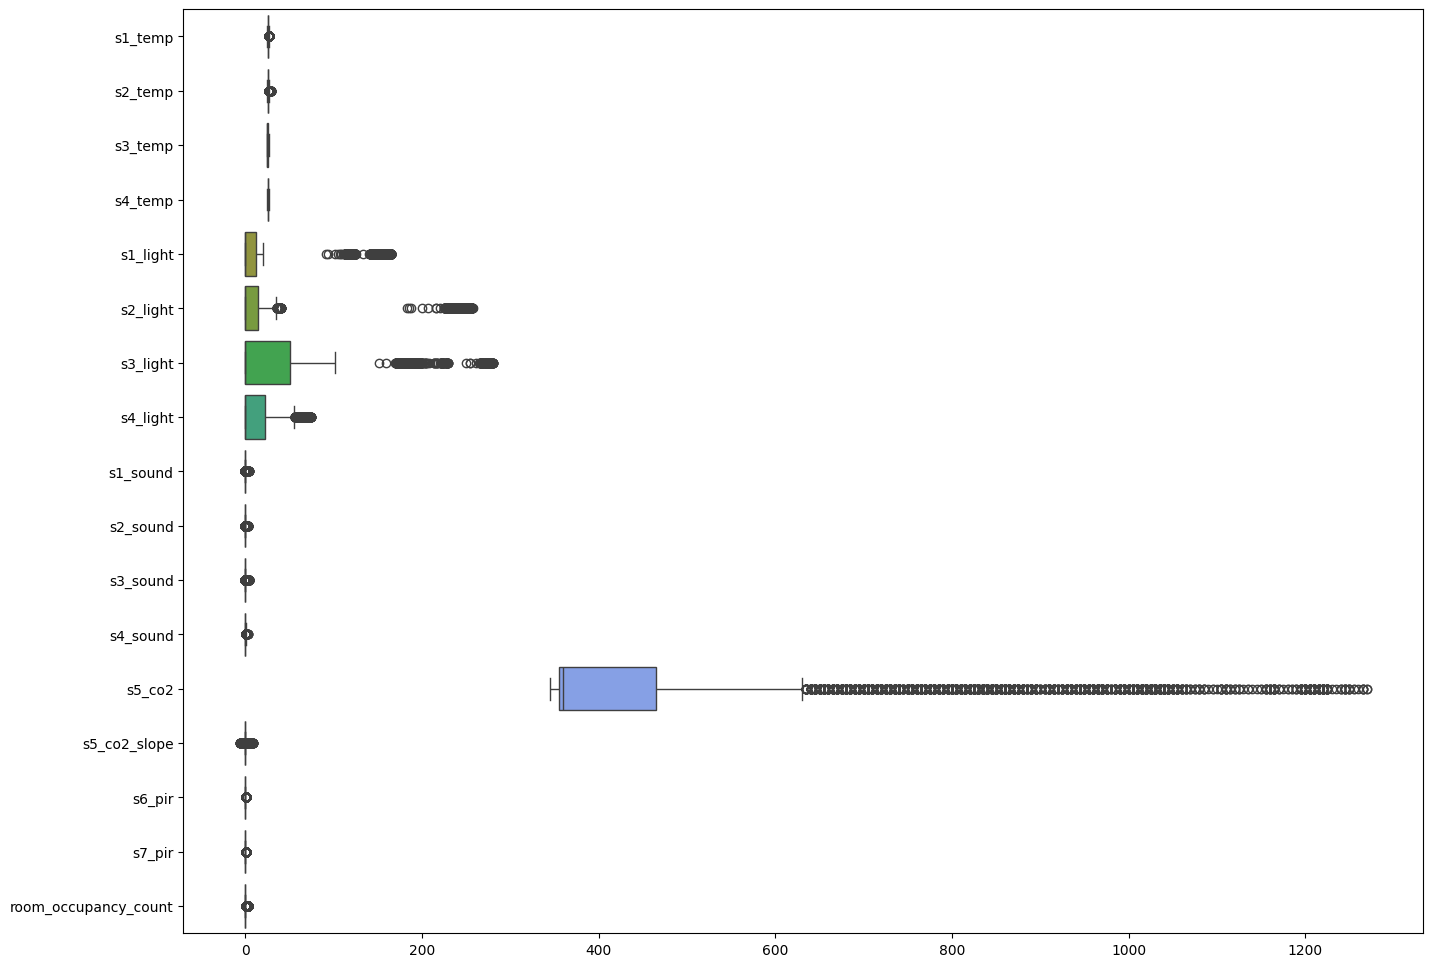

In [11]:
plt.figure(figsize = (16,12))
sns.boxplot(data = df,orient = "h")

**Data Imbalance Check**

Text(0.5, 1.0, 'Countplot of the Rooms')

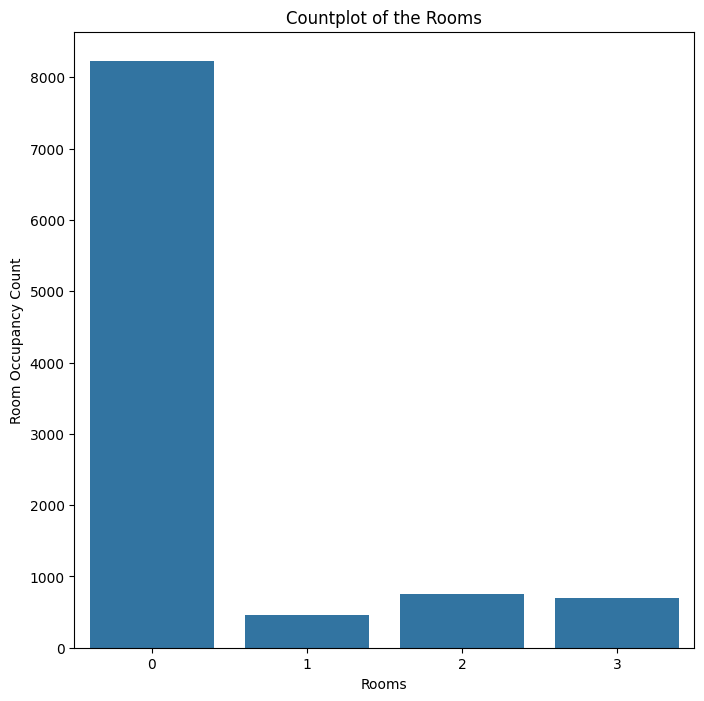

In [12]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'room_occupancy_count', data = df)
plt.ylabel('Room Occupancy Count')
plt.xlabel('Rooms')
plt.title('Countplot of the Rooms')

Text(0.5, 1.0, 'Proportion of Room Occupancy')

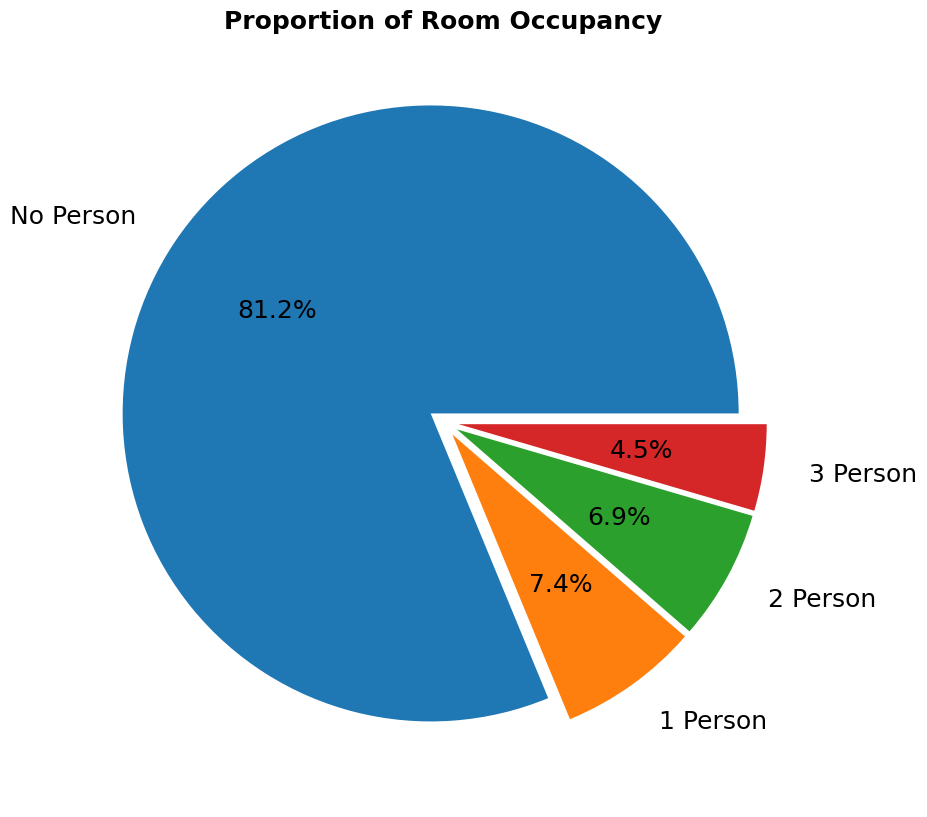

In [13]:
# Pie chart for room occupancy

plt.figure(figsize = (18, 10))
labels = ['No Person', '1 Person', '2 Person', '3 Person']

ax = plt.pie(df['room_occupancy_count'].value_counts(),
             labeldistance = 1.15, labels = labels,
             autopct = '%1.1f%%',
             explode = [0.05, 0.05, 0.05, 0.05],
             textprops = {'fontsize': 18})

plt.title('Proportion of Room Occupancy',
          fontsize = 18, fontweight = 'bold')

In [14]:
df['room_occupancy_count'].value_counts()

,room_occupancy_count
0,8228
2,748
3,694
1,459


It can be observed that there's a huge imbalance in the dataset, generating synthetic dataset is not an optimal choice here, therefore, undersampling the dataset

**Data UnderSampling**

In [15]:
# Defining independent and dependent features

X = df.drop('room_occupancy_count', axis = 1)
y = df['room_occupancy_count']

In [16]:
# Undersampling the data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

X_resampled, y_resampled = rus.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((1836, 16), (1836,))

In [17]:
y_resampled.value_counts()

,room_occupancy_count
0,459
1,459
2,459
3,459


**BiVariate Analysis**

Text(0.5, 1.03, 'Correlations Among Features')

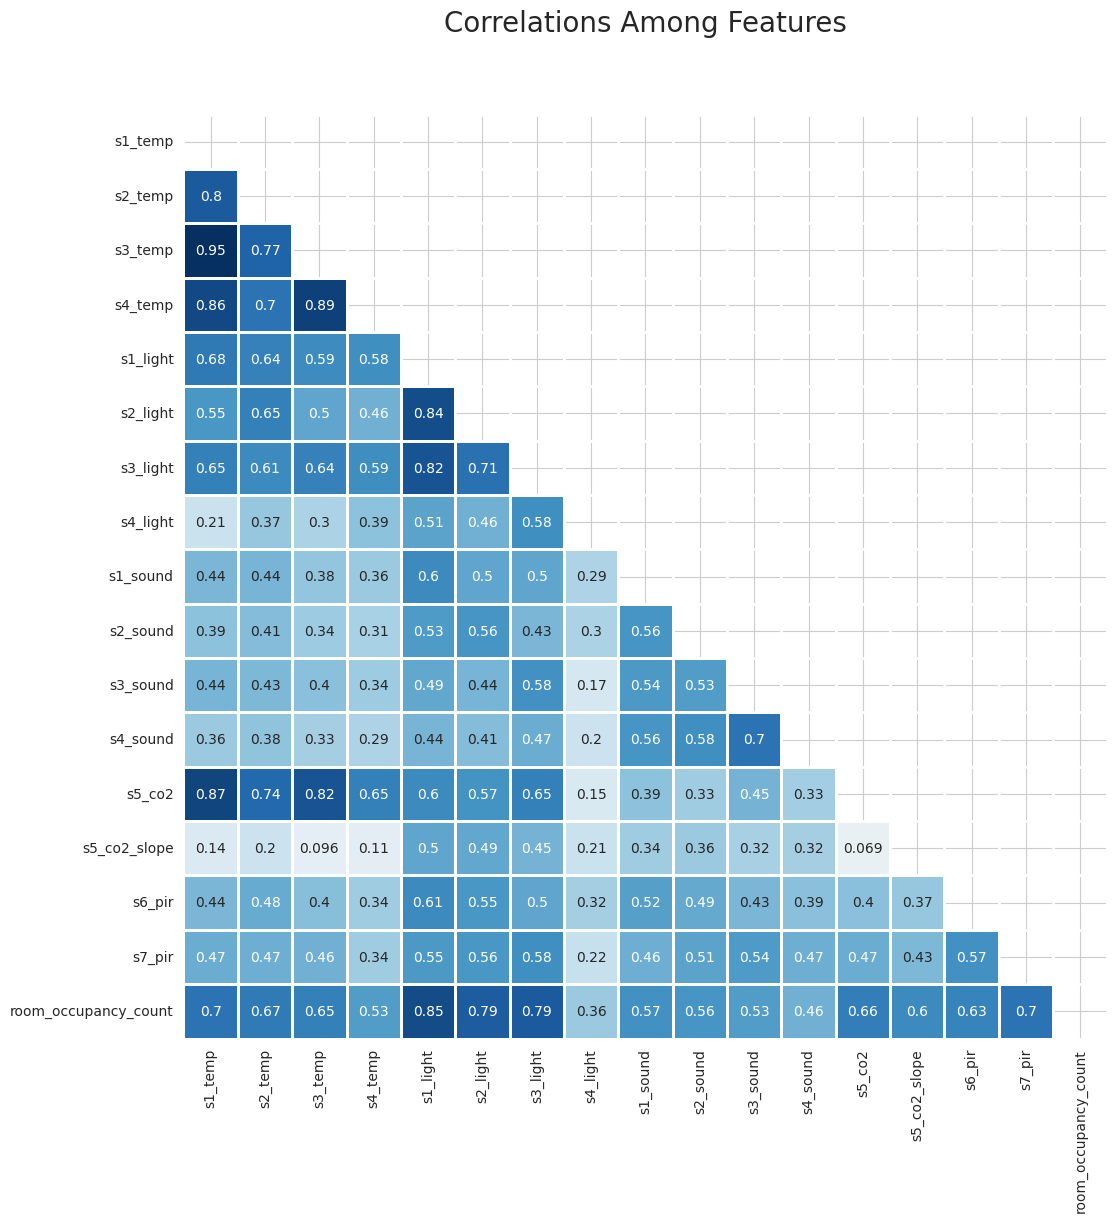

In [18]:
## Correaltion heatmap

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (16,12))
sns.heatmap(df.corr(), annot=True, mask = mask, cbar = False,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

([<matplotlib.axis.XTick at 0x7cc6de918d90>,
 [Text(0, 0, 'No one'),
  Text(1, 0, '1 Person'),
  Text(2, 0, '2 People'),
  Text(3, 0, '3 People')])

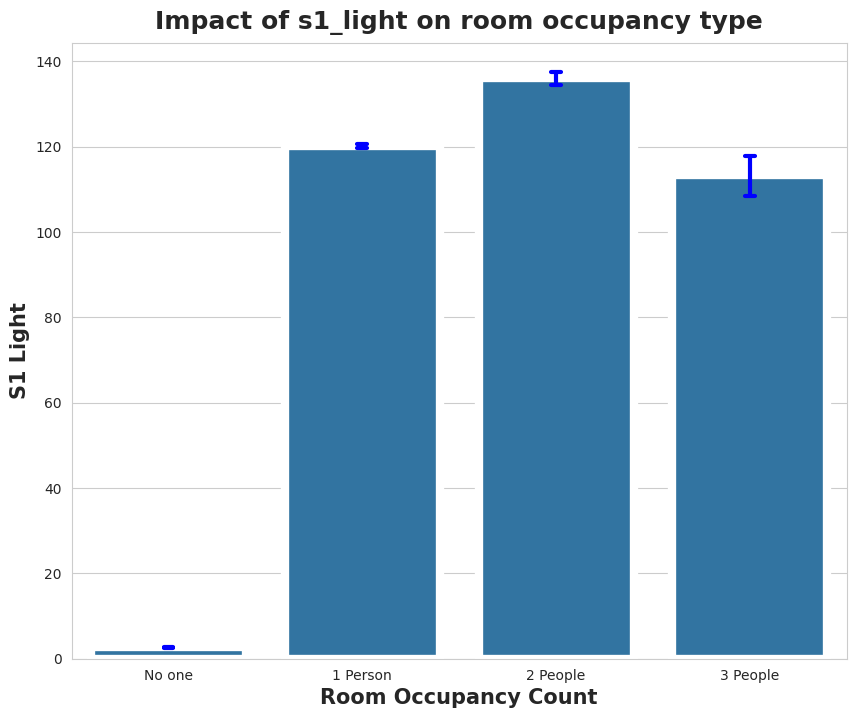

In [19]:
# s1_light room occupancy

plt.subplots(figsize = (10,8))

sns.barplot(x = "room_occupancy_count", y = "s1_light", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s1_light on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S1 Light", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7cc6d8cf94e0>,
 [Text(0, 0, 'No one'),
  Text(1, 0, '1 Person'),
  Text(2, 0, '2 People'),
  Text(3, 0, '3 People')])

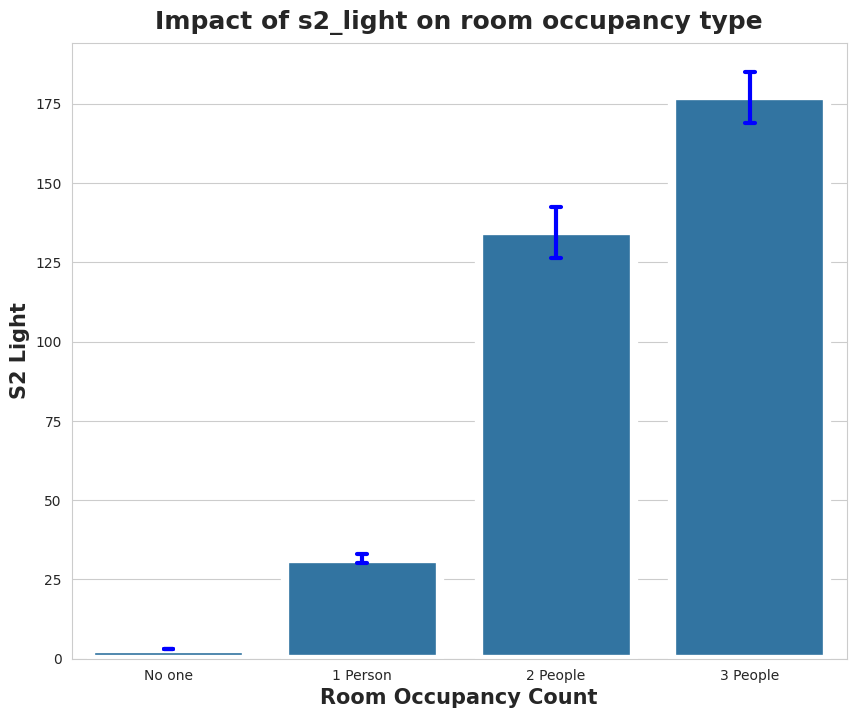

In [20]:
# s2_light room occupancy

plt.subplots(figsize = (10,8))

sns.barplot(x = "room_occupancy_count", y = "s2_light", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s2_light on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S2 Light", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7cc6d8e84d90>,
 [Text(0, 0, 'No one'),
  Text(1, 0, '1 Person'),
  Text(2, 0, '2 People'),
  Text(3, 0, '3 People')])

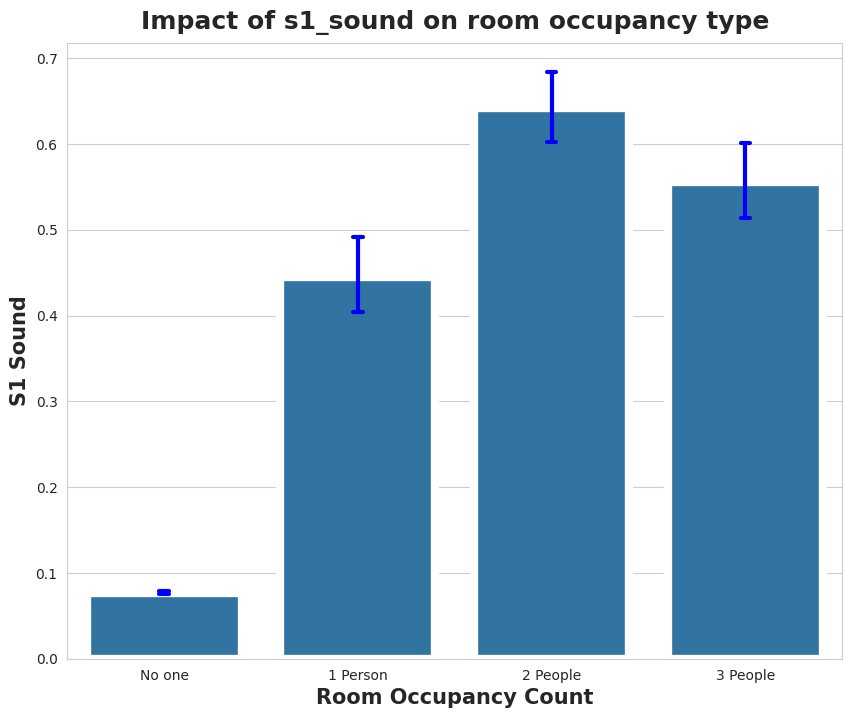

In [21]:
# s1_sound room occupancy

plt.subplots(figsize = (10,8))

sns.barplot(x = "room_occupancy_count", y = "s1_sound", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s1_sound on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S1 Sound", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7cc6d8be9bd0>,
 [Text(0, 0, 'No one'),
  Text(1, 0, '1 Person'),
  Text(2, 0, '2 People'),
  Text(3, 0, '3 People')])

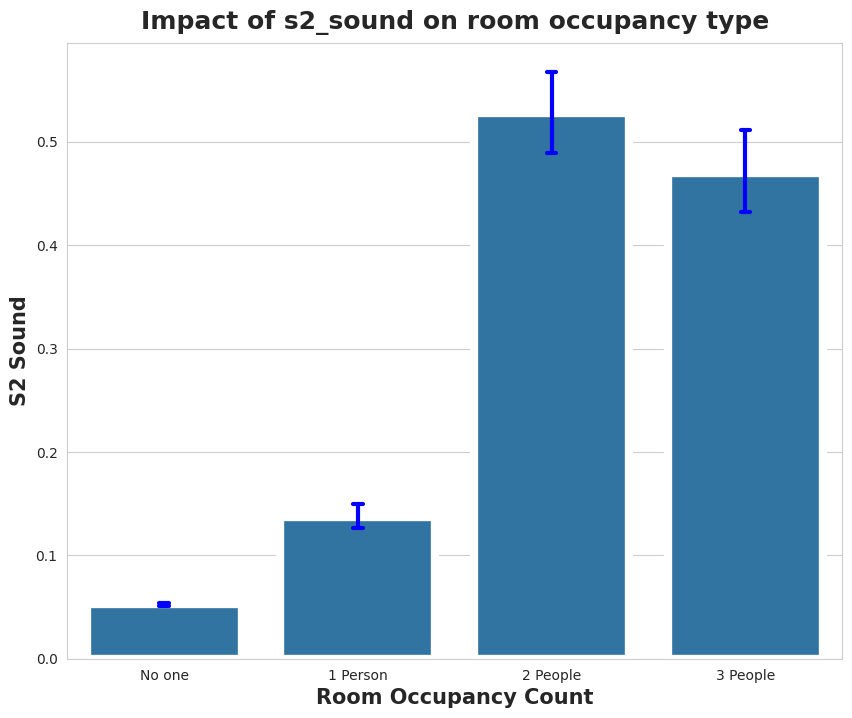

In [22]:
# s2_sound room occupancy

plt.subplots(figsize = (10,8))

sns.barplot(x = "room_occupancy_count", y = "s2_sound", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s2_sound on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S2 Sound", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]
plt.xticks(val, names)

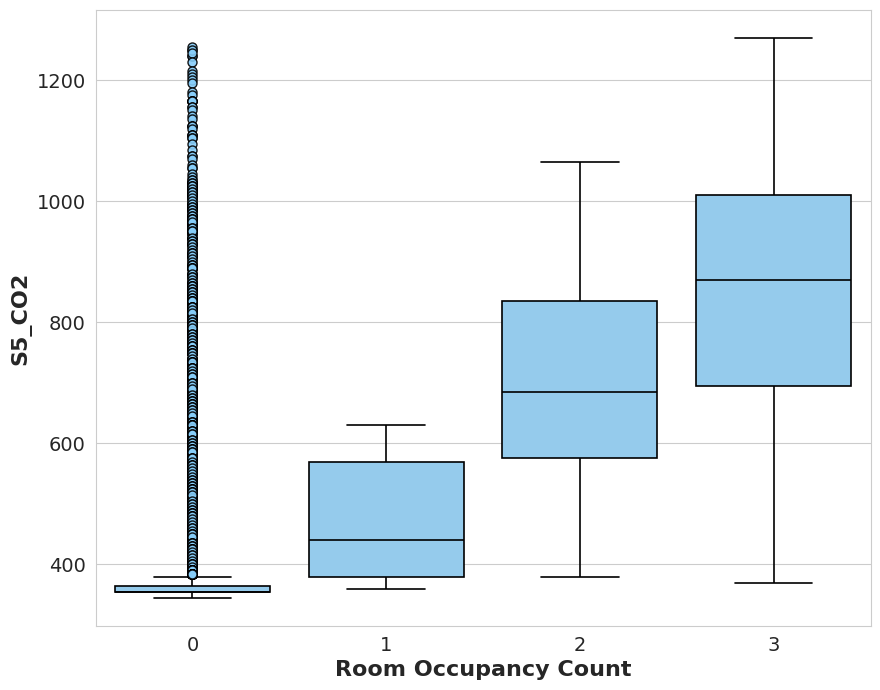

In [23]:
# Rise in CO2 levels with room occupancy

plt.figure(figsize = (10,8))

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, color, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)


plot_box(df, x = "room_occupancy_count", y = "s5_co2", xlabel = 'Room Occupancy Count', ylabel = "S5_CO2", title = "Rise in CO2 levels",
         color = "lightskyblue")

**Feature Engineering**

For feature engineering part, since the columns have no null values and the classification problem will mostly deal with tree based algorithmns, therefore, the features are not transformed. For time series classification, addition of time component to the features can help improve model metrics, therefore, a handful of time component features are added to the dataframe like hour of the day, day of the week etc

In [24]:
# Creating features for Time Series Modeling

# New time features
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day

In [39]:
!pip install featurewiz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [26]:
!pip install --upgrade pandas
!pip install "dask[dataframe]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
featurewiz 0.5.7 requires pandas<2.0,>=1.3.4, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
lazytransform 1.16 requires pandas<2.0,>=1.2.4, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [27]:
# Feature Selection using Featurewiz

from featurewiz import featurewiz

features = featurewiz(df, target = 'room_occupancy_count', corr_limit = 0.70, verbose = 2)

ImportError: Dask dataframe requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[dataframe]" --upgrade  # or python -m pip install

In [28]:
# Selecting best features

df_selected = X_resampled[['s1_light',
                           's2_temp',
                           's4_light',
                           's5_co2_slope',
                           's3_sound',
                         ]]

In [29]:
# Preparing Dataset

X = df_selected
y = y_resampled

In [30]:
# Data Preparation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
# Intitalize empty DataFrame

table = pd.DataFrame(index = ['Accuracy', 'F1 Score', 'Precision', 'Recall'])

**Modelling**
**Model Metrics**

In [36]:
# Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Print and add model metrics
def model_metrics(model, model_name):

    y_pred = model.predict(X_test)

    accuracy   =  accuracy_score(y_test, y_pred)
    f1         =  f1_score(y_test, y_pred, average = 'macro')
    precision  =  precision_score(y_test, y_pred, average = 'macro')
    recall     =  recall_score(y_test, y_pred, average = 'macro')
    clf_report =  classification_report(y_test ,y_pred)


    print(f'''


          ===========================================================================
          ==================  E V A L U A T I O N   M E T R I C S  ==================


              Accuracy of Model : {accuracy * 100 :.2f} %

              F1 Score of Model : {f1 :.3f}

              Precision Score    : {precision :.3f}

              Recall Score      : {recall :.3f}


          ===========================================================================



        ''')
    print(clf_report)
    print('\n \n \n')

    # Confusion Matrix

    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.set_theme(style = 'whitegrid', rc = {'figure.figsize' : (16,6)})

    fig, axs = plt.subplots(1,2)

    # Number count
    ax1 = sns.heatmap(cf_matrix, annot = True,cmap = 'Reds', ax = axs[0], fmt = "g")
    ax1.set_title('Room Occupancy Prediction Count')

    # Percentage
    ax2 = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues', ax = axs[1])
    ax2.set_title('Room Occupancy Prediction in %')

    # Storing values in a dataframe
    table[model_name] = [accuracy, f1, precision, recall]

**Decision Tree Model**

In [37]:
# Defining the Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Fit on Data
dt.fit(X_train, y_train)

DecisionTreeClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.55 %

              F1 Score of Model : 0.986

              Precision Score    : 0.986

              Recall Score      : 0.986 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.99      0.99      0.99       143
           2       0.97      0.98      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



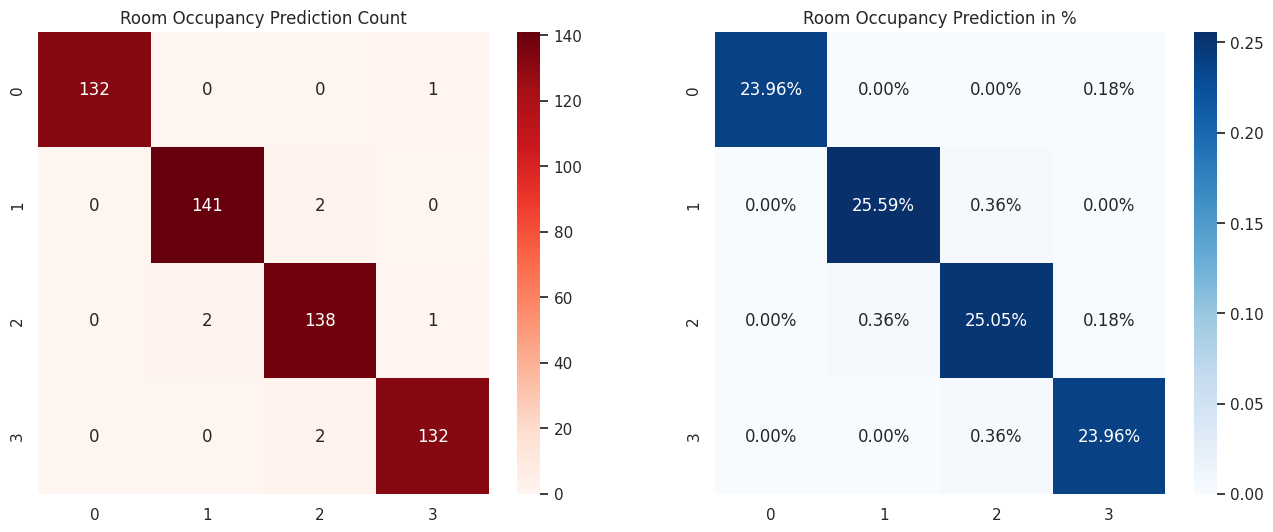

In [38]:
model_metrics(dt, 'Decision Tree')

**Random Forest Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit on Data
rf.fit(X_train, y_train)

RandomForestClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 99.09 %

              F1 Score of Model : 0.991

              Precision Score    : 0.991

              Recall Score      : 0.991 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.99      0.99      0.99       143
           2       0.99      0.98      0.98       141
           3       0.99      1.00      1.00       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



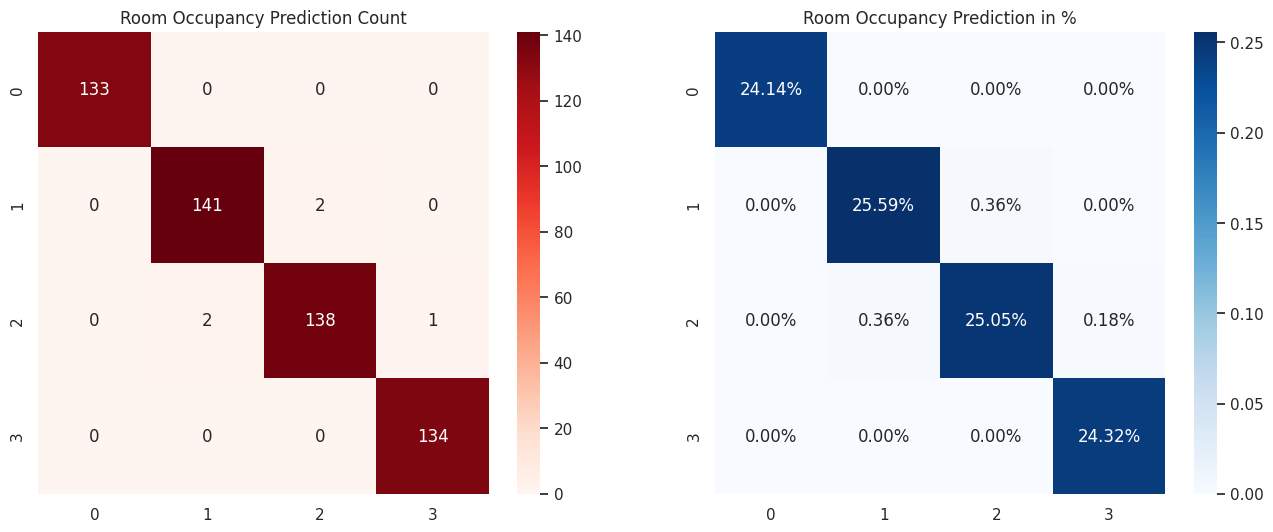

In [40]:
# Check Model Metrics

model_metrics(rf,  'Random Forest')

**Hyper Parameter Tuning the Random Forest Model**

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [42]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [44]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [45]:
rf_RandomGrid.best_params_

{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [46]:
# Check Accuracy

print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.970
Test Accuracy - : 0.960


In [47]:
# Model with best parameters

rf_tuned = RandomForestClassifier(n_estimators = 80,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  max_features = 'sqrt',
                                  max_depth = 4,
                                  bootstrap = True)

# Fit on Data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=80)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 97.10 %

              F1 Score of Model : 0.971

              Precision Score    : 0.972

              Recall Score      : 0.971 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.95      0.99      0.97       143
           2       0.96      0.93      0.95       141
           3       0.98      0.98      0.98       134

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551


 
 



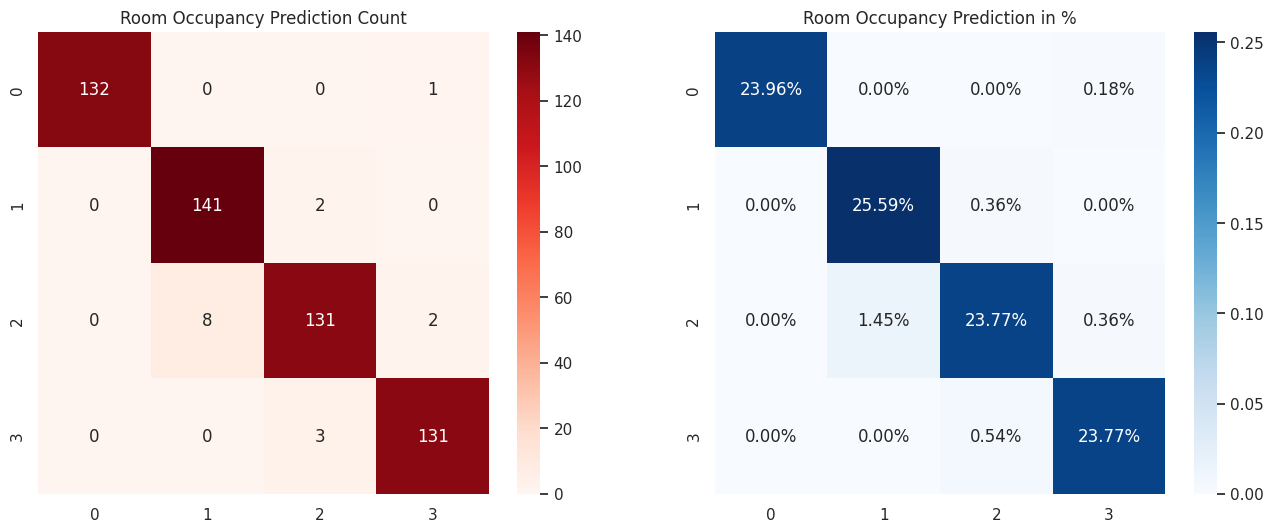

In [48]:
# Check Metrics of tuned model

model_metrics(rf_tuned, 'Tuned RandomForest')

**Bagging Classifier**

In [49]:
# Defining the Bagging Classifier Model

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()

# Fit on data
bc.fit(X_train, y_train)

BaggingClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.73 %

              F1 Score of Model : 0.987

              Precision Score    : 0.987

              Recall Score      : 0.987 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.99      0.99      0.99       143
           2       0.98      0.98      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



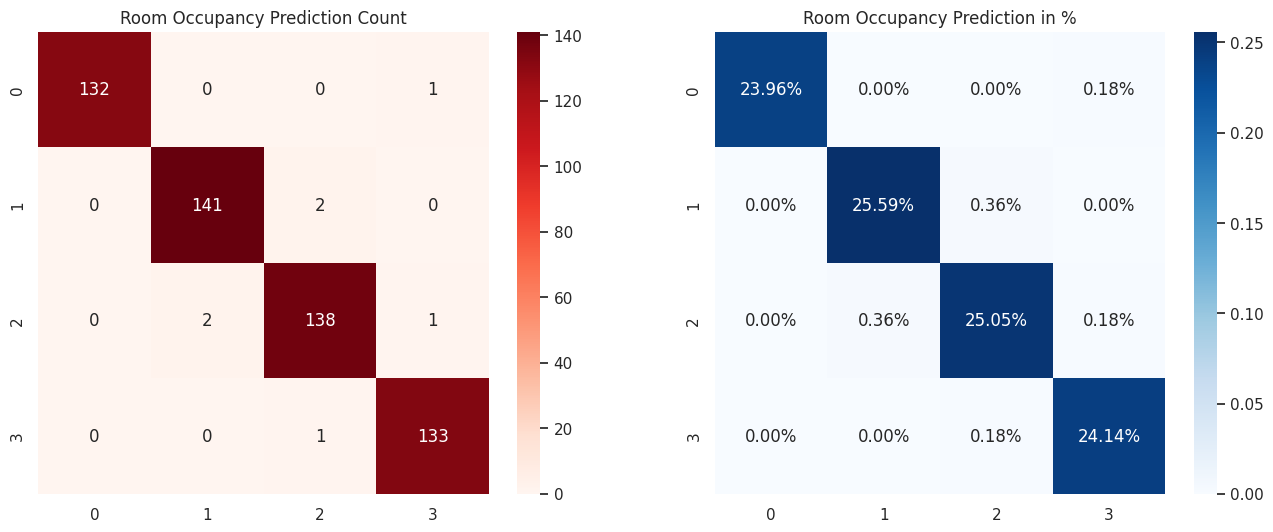

In [50]:
# Check model metrics

model_metrics(bc, 'Bagging Classifier')

**SVM Model**

In [51]:
# Defining the SVM Model

from sklearn.svm import LinearSVC

svm = LinearSVC()

# Fit on data
svm.fit(X_train, y_train)

LinearSVC()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 59.17 %

              F1 Score of Model : 0.546

              Precision Score    : 0.694

              Recall Score      : 0.592 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       133
           1       0.42      1.00      0.59       143
           2       0.45      0.13      0.20       141
           3       0.92      0.27      0.42       134

    accuracy                           0.59       551
   macro avg       0.69      0.59      0.55       551
weighted avg       0.69      0.59      0.54       551


 
 



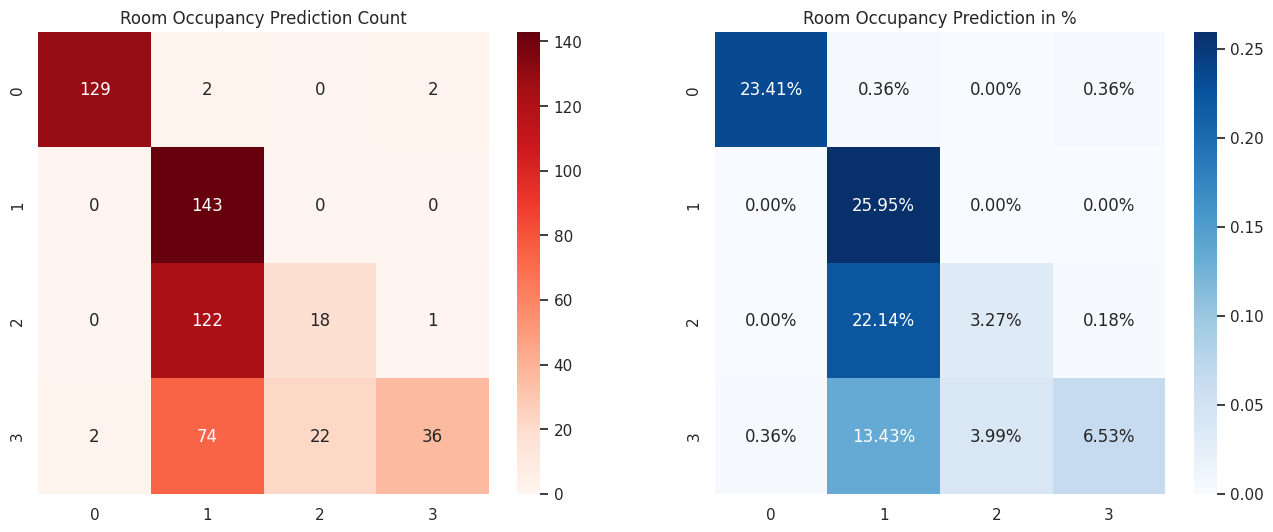

In [52]:
# Check model metrics

model_metrics(svm, 'SVC')

**ExaTrees Classifier**

In [53]:
# Defining the ExtraTrees Classifier Model

from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()

# Fir on data
et.fit(X_train, y_train)

ExtraTreesClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 99.09 %

              F1 Score of Model : 0.991

              Precision Score    : 0.991

              Recall Score      : 0.991 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.99      0.99      0.99       143
           2       0.98      0.99      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



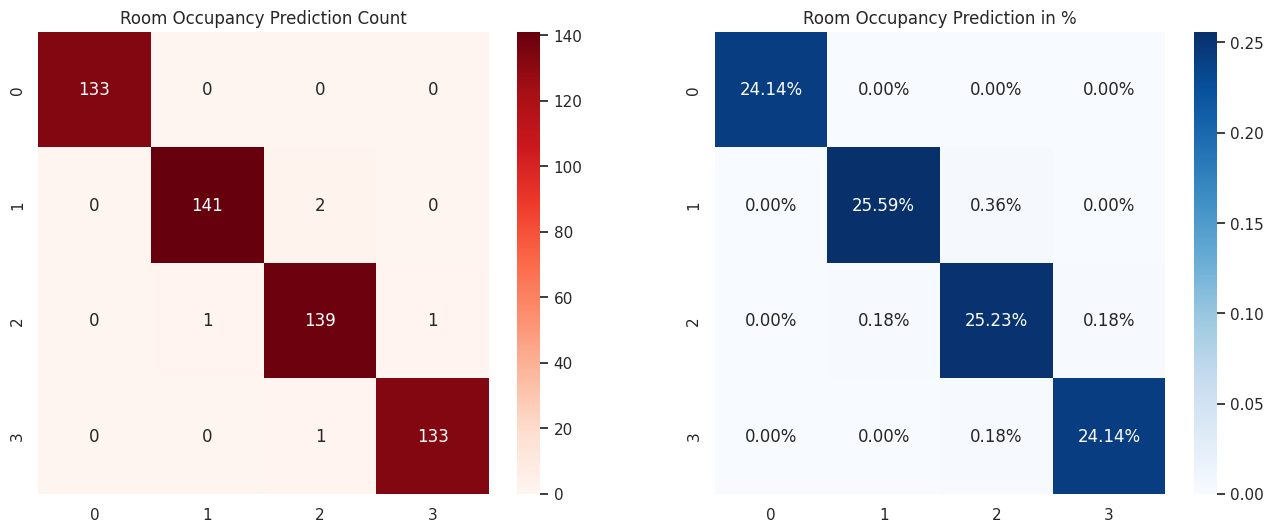

In [54]:
# Check model metrics

model_metrics(et, 'ExtraTrees Classifier')

**Cat Boost Classifier**

In [56]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [57]:
# Defining the Catboost Model

import catboost as cb

model_cb = cb.CatBoostClassifier()

# Fit on Data
model_cb.fit(X_train, y_train, verbose = False)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.55 %

              F1 Score of Model : 0.986

              Precision Score    : 0.986

              Recall Score      : 0.986 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.99      0.99      0.99       143
           2       0.97      0.98      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



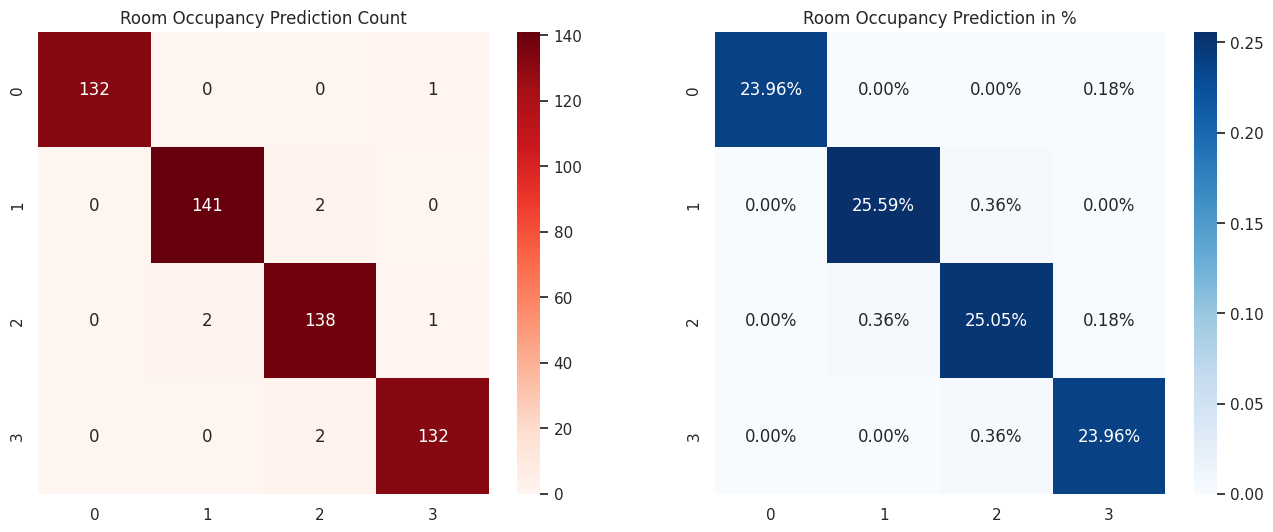

In [58]:
# Check model metrics

model_metrics(model_cb, 'CatBoost')

**Gradient Boosting Classifier**

In [59]:
# Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Fit on Data
gbc.fit(X_train, y_train)

GradientBoostingClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.19 %

              F1 Score of Model : 0.982

              Precision Score    : 0.982

              Recall Score      : 0.982 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.98      0.99      0.98       143
           2       0.97      0.96      0.97       141
           3       0.98      0.99      0.98       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



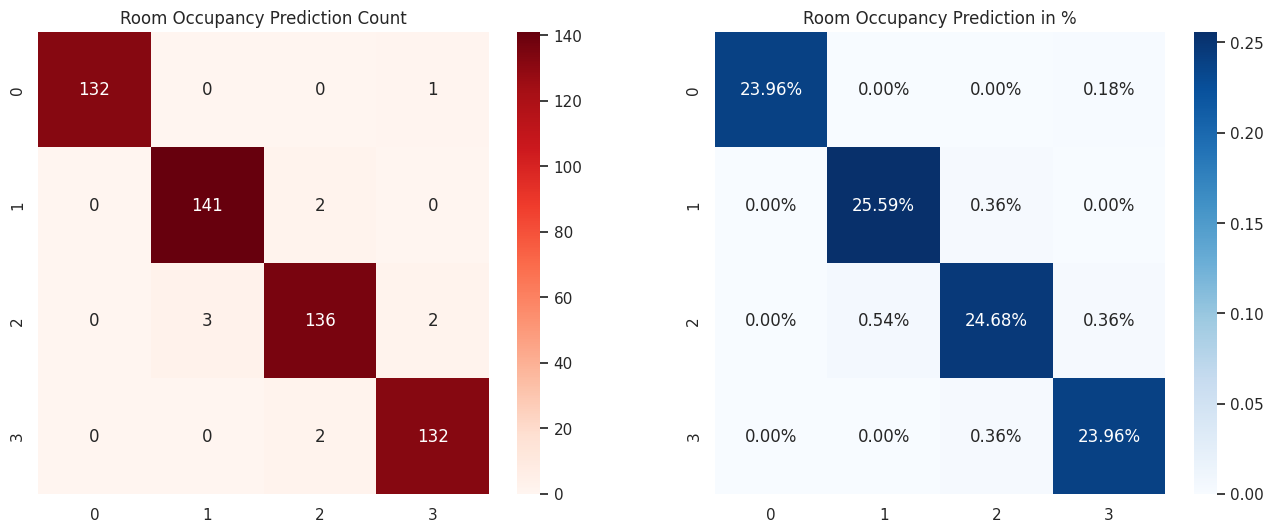

In [60]:
# Model Metrics

model_metrics(gbc, 'Gradient Boosting')

**Ada Boost Classifier**

In [61]:
# AdaBoost Model

from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
adaboost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Fit model on data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 74.77 %

              F1 Score of Model : 0.749

              Precision Score    : 0.758

              Recall Score      : 0.747 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.95      0.90      0.92       143
           2       0.51      0.65      0.57       141
           3       0.57      0.46      0.51       134

    accuracy                           0.75       551
   macro avg       0.76      0.75      0.75       551
weighted avg       0.76      0.75      0.75       551


 
 



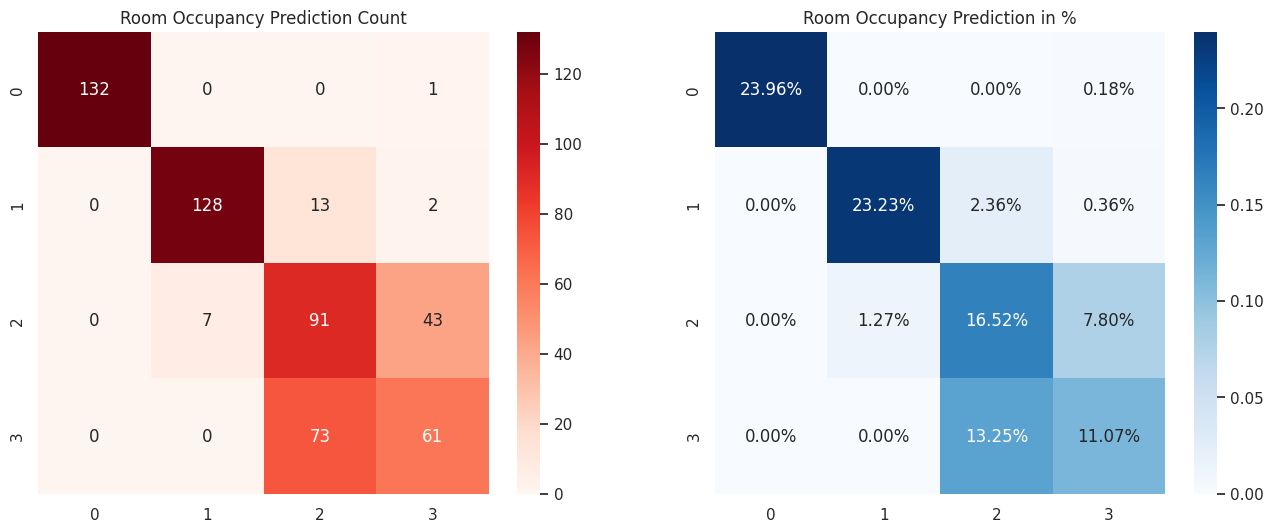

In [62]:
# Model Metrics

model_metrics(adaboost, 'AdaBoost')

**XGBoost Classifier**

In [63]:
# XGBoost Model

import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

# Fit on Data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [64]:
# Model Metrics

y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.37 %

              F1 Score of Model : 0.984

              Precision Score    : 0.984

              Recall Score      : 0.984 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.97      0.99      0.98       143
           2       0.97      0.96      0.97       141
           3       0.99      0.99      0.99       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



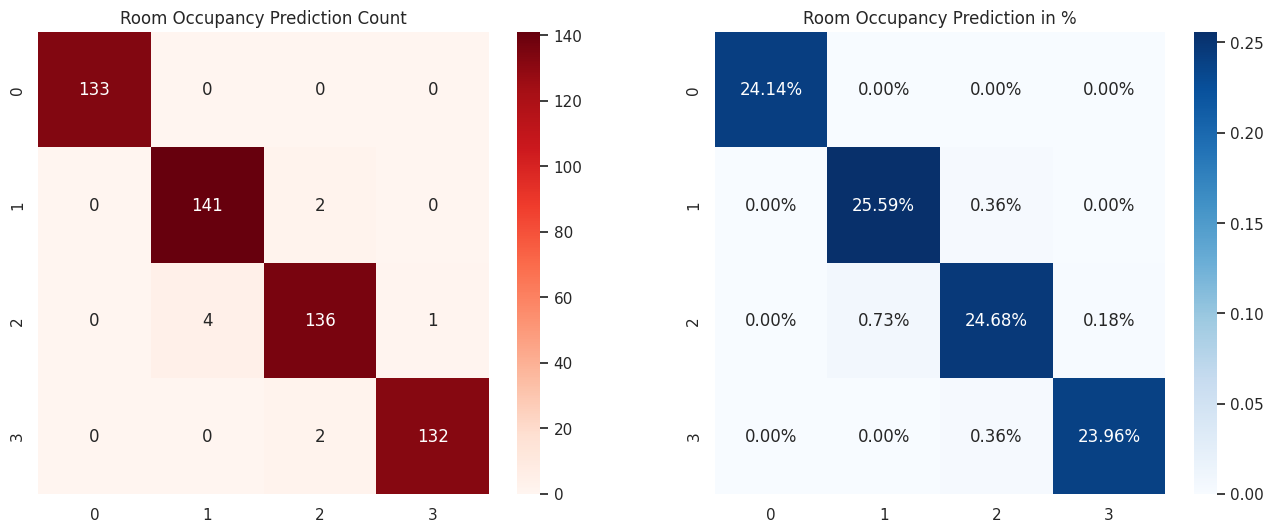

In [65]:
model_metrics(model_xgb, 'XGBoost')

**KNeighbors Classifier**

In [67]:
# Defining the KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

# Fit on data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 94.74 %

              F1 Score of Model : 0.948

              Precision Score    : 0.949

              Recall Score      : 0.948 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       133
           1       0.91      0.97      0.94       143
           2       0.94      0.89      0.91       141
           3       0.95      0.98      0.96       134

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551


 
 



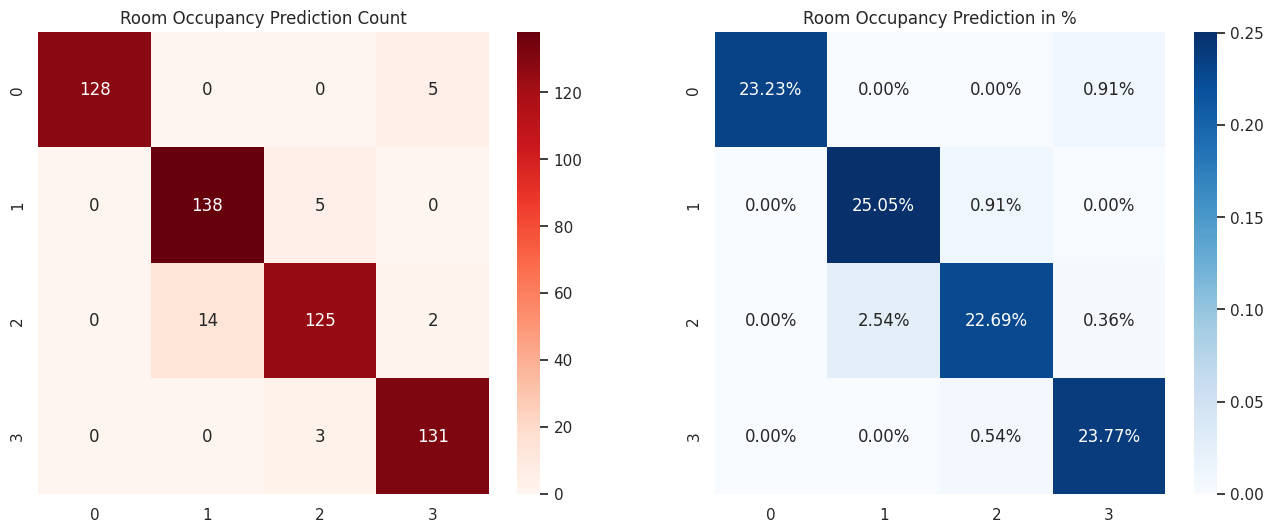

In [68]:
# Check model metrics

model_metrics(knn, 'KNN')

**Hyper Parameter Tuning KNeighbors Classifier**

In [69]:
# Parameters

grid_params = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [70]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

# Fit model on data
g_res = gs.fit(X_train, y_train)

# Get best parameters
g_res.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [71]:
# Tuned KNN Model

tuned_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'brute',metric = 'manhattan')

# Fit on data
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.37 %

              F1 Score of Model : 0.984

              Precision Score    : 0.984

              Recall Score      : 0.984 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       133
           1       0.99      0.99      0.99       143
           2       0.98      0.98      0.98       141
           3       0.96      0.99      0.98       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



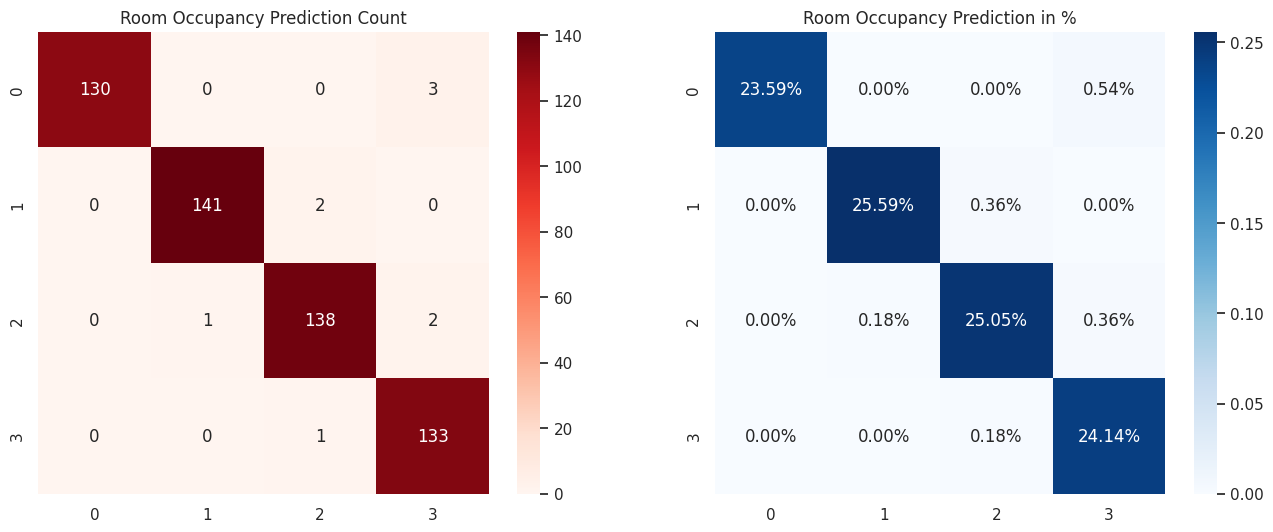

In [72]:
# Model Metrics on tuned data

model_metrics(tuned_knn, 'Tuned KNeighbors Classifier')

In [73]:
table.T


,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.990926,0.991126,0.991080,0.991184
Tuned RandomForest,0.970962,0.971360,0.971789,0.971296
Bagging Classifier,0.987296,0.987453,0.987481,0.987439
SVC,0.591652,0.545815,0.694291,0.591560
ExtraTrees Classifier,0.990926,0.991086,0.991092,0.991092
CatBoost,0.985481,0.985645,0.985730,0.985573
Gradient Boosting,0.981851,0.982047,0.982093,0.982027
AdaBoost,0.747731,0.748910,0.758091,0.747050
XGBoost,0.983666,0.983976,0.984081,0.983907


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Accuracy', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='F1 Score', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)